<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 2*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
import numpy as np
data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

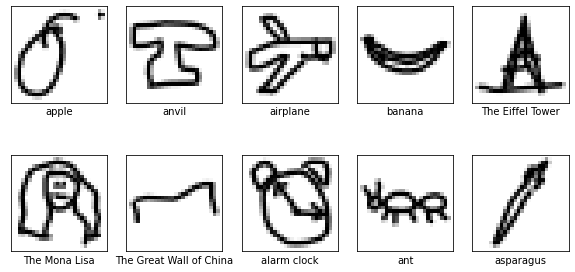

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* The default batchsize should be fine for this exercise.
* Limit your model epochs to 30 each time you fit.



In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [5]:
import tensorflow as tf

from sklearn.utils import shuffle
X, y = shuffle(X, y)

model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'), 
                    Dense(10, activation='softmax')
])

model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

sgd_run = model.fit(X,y, epochs=30, validation_split=.2)

Epoch 1/30
2500/2500 [==============================] - 3s 1ms/step - loss: 2.2164 - accuracy: 0.2777 - val_loss: 2.1046 - val_accuracy: 0.2871
Epoch 2/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.9910 - accuracy: 0.3306 - val_loss: 1.8906 - val_accuracy: 0.3448
Epoch 3/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.8091 - accuracy: 0.3480 - val_loss: 1.7506 - val_accuracy: 0.3426
Epoch 4/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.7009 - accuracy: 0.3568 - val_loss: 1.6802 - val_accuracy: 0.3789
Epoch 5/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.6395 - accuracy: 0.3590 - val_loss: 1.6343 - val_accuracy: 0.3516
Epoch 6/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.6073 - accuracy: 0.3708 - val_loss: 1.6350 - val_accuracy: 0.3553
Epoch 7/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.5885 - accuracy: 0.3649 - val_loss: 1.5727 - val_accuracy:

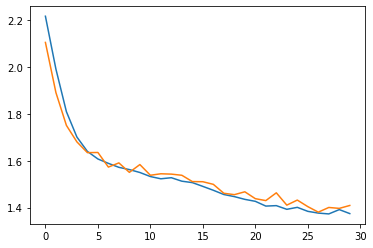

In [7]:
import seaborn as sns

epochs = [i for i in range(len(sgd_run.history['loss']))]
sns.lineplot(epochs, sgd_run.history['loss'])
sns.lineplot(epochs, sgd_run.history['val_loss']);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [8]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

adam_run = model.fit(X,y, epochs=30, validation_split=.2)

Epoch 1/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3518 - accuracy: 0.5367 - val_loss: 1.3905 - val_accuracy: 0.5200
Epoch 2/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3564 - accuracy: 0.5302 - val_loss: 1.3702 - val_accuracy: 0.5349
Epoch 3/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3378 - accuracy: 0.5489 - val_loss: 1.3323 - val_accuracy: 0.5640
Epoch 4/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3181 - accuracy: 0.5630 - val_loss: 1.3310 - val_accuracy: 0.5630
Epoch 5/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3096 - accuracy: 0.5617 - val_loss: 1.3416 - val_accuracy: 0.5433
Epoch 6/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3131 - accuracy: 0.5576 - val_loss: 1.3349 - val_accuracy: 0.5573
Epoch 7/30
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3096 - accuracy: 0.5665 - val_loss: 1.3311 - val_accuracy:

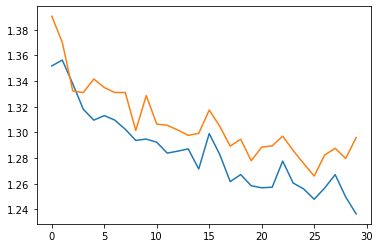

In [9]:
import seaborn as sns

epochs = [i for i in range(len(adam_run.history['loss']))]
sns.lineplot(epochs, adam_run.history['loss'])
sns.lineplot(epochs, adam_run.history['val_loss']);

In [ ]:
##

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

In [13]:
### Answers
# 1) Categorical Crossentropy, by checking the predictions compared to the original labels.
# 2) Loss function is used to optimize the model, and is made smaller when optimized. A Metric is used to judge how well your model performs.
# 3) Newer optimizers have more variables to finer tune your models.

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)